# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [39]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
responses = []

# Get weather data
print("Beginning Data Retrieval")
print("---------------------------------")

city_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    if (i%50 == 0 and i>= 50):
        set_counter += 1
        city_counter = 0
        
    city_url = url + "&q=" + city    
    print("Processing Record %s of Set %s | %s" % (city_counter, set_counter, city)) 
    city_counter += 1
       
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        dates = response["dt"]
        country = response["sys"]["country"]
        
        responses.append({"City": city, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Date":dates, "Country":country})
               
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | awbari
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | gat
Processing Record 7 of Set 1 | acarau
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | azovo
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | balikpapan
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | baghdad
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | molochnoye
Processing Record 18 of Set 1 | ormara
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | mercedes
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | mehamn
Processing Record 23 of Set 1 | khon kaen
Proces

Processing Record 39 of Set 4 | mecca
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | skelleftea
Processing Record 42 of Set 4 | nassau
Processing Record 43 of Set 4 | belmonte
Processing Record 44 of Set 4 | warrington
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | kristiinankaupunki
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | yarada
Processing Record 0 of Set 5 | tawkar
City not found. Skipping...
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | hun
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | spencer
Processing Record 7 of Set 5 | nikolaevo
Processing Record 8 of Set 5 | pierre
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | morro bay
Processing Record 11 of Set 5 | p

Processing Record 28 of Set 8 | korop
Processing Record 29 of Set 8 | banda aceh
Processing Record 30 of Set 8 | gravdal
Processing Record 31 of Set 8 | kurakh
Processing Record 32 of Set 8 | cabra
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | taperoa
Processing Record 35 of Set 8 | mahebourg
Processing Record 36 of Set 8 | honiara
Processing Record 37 of Set 8 | vamvakou
Processing Record 38 of Set 8 | banyo
Processing Record 39 of Set 8 | pathri
Processing Record 40 of Set 8 | willowmore
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | merrill
Processing Record 43 of Set 8 | skiros
City not found. Skipping...
Processing Record 44 of Set 8 | hihifo
City not found. Skipping...
Processing Record 45 of Set 8 | chipata
Processing Record 46 of Set 8 | guerrero negro
Processing Record 47 of Set 8 | ballina
Processing Record 48 of Set 8 | potoci
Processing Record 49 of Set 8 | grindavik
Processing Record 0 of Set 9 | berndorf
Processing Re

Processing Record 17 of Set 12 | kropotkin
Processing Record 18 of Set 12 | bairiki
Processing Record 19 of Set 12 | miraflores
Processing Record 20 of Set 12 | trzebinia
Processing Record 21 of Set 12 | alice town
Processing Record 22 of Set 12 | grand gaube
Processing Record 23 of Set 12 | nabire
Processing Record 24 of Set 12 | santa cruz
Processing Record 25 of Set 12 | atka
City not found. Skipping...
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | bajram curri
Processing Record 28 of Set 12 | blagoveshchenka
Processing Record 29 of Set 12 | alexandria
Processing Record 30 of Set 12 | oranjemund
Processing Record 31 of Set 12 | mehran
Processing Record 32 of Set 12 | uniao
Processing Record 33 of Set 12 | henderson
Processing Record 34 of Set 12 | belonia
Processing Record 35 of Set 12 | vestmannaeyjar
Processing Record 36 of Set 12 | roald
Processing Record 37 of Set 12 | aojiang
Processing Record 38 of Set 12 | saint-augustin


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
cities_df = pd.DataFrame(responses, columns=["City","Lat","Lng","Max Temp","Humidity",
                                             "Cloudiness","Wind Speed","Date","Country"])
#convert date from int64 to datetime format
cities_df['Date'] = pd.to_datetime(cities_df['Date'])
#remove unnecessary sec, min, hours
cities_df = cities_df.assign(Date = lambda x: pd.to_datetime(x['Date'].dt.strftime('%Y-%m-%d')))
cities_df.to_csv('output.csv', index=True)


In [41]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,albany,42.6001,-73.9662,60.03,86,39,3.13,1970-01-01,US
1,awbari,26.5921,12.7805,94.57,13,0,10.04,1970-01-01,LY
2,avarua,-21.2078,-159.7750,77.05,73,100,19.57,1970-01-01,CK
3,rikitea,-23.1203,-134.9692,70.95,71,95,22.84,1970-01-01,PF
4,atuona,-9.8000,-139.0333,77.32,64,100,14.05,1970-01-01,PF


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
cities_df['Humidity'].describe()

count    570.000000
mean      67.836842
std       21.767820
min       10.000000
25%       54.000000
50%       73.500000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

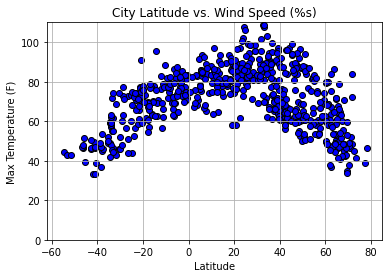

In [42]:
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

#make a scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (%s)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("lat_temp_plot.png")



## Latitude vs. Humidity Plot

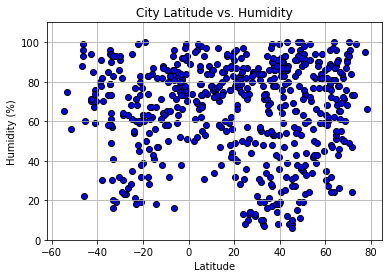

In [43]:
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("lat_humidity.png")

## Latitude vs. Cloudiness Plot

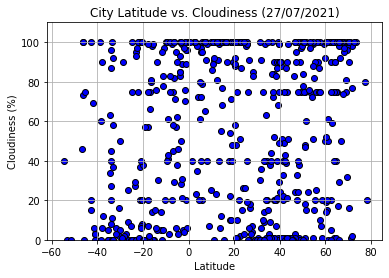

In [44]:
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

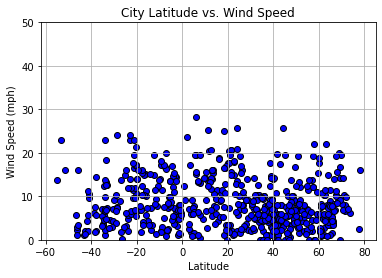

In [45]:
x_axis = cities_df['Lat']
y_axis = cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("lat_windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.3416229548643569


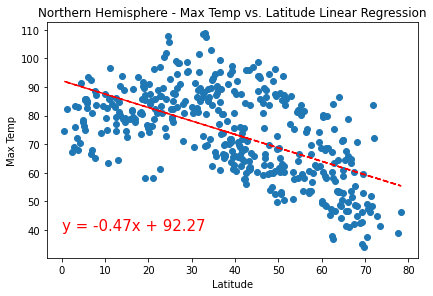

In [46]:
northern_hem_df = cities_df[cities_df['Lat'] >= 0]
southern_hem_df = cities_df[cities_df['Lat'] < 0]

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is:{rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.619601464043425


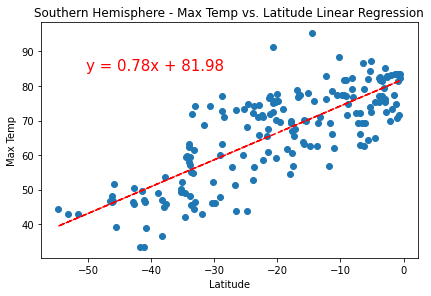

In [47]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.2, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002578281169238074


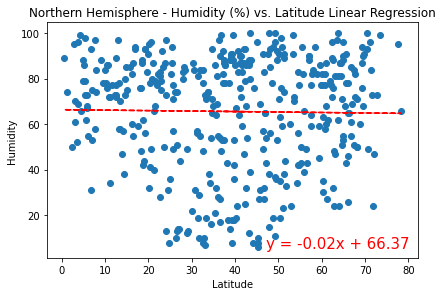

In [48]:
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .2), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.009542648262475506


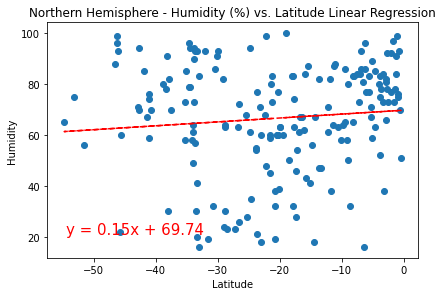

In [49]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.15, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 6.038625214386079e-05


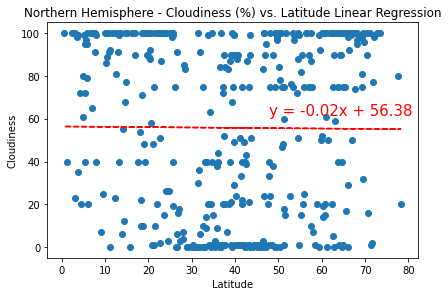

In [50]:
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09851058711669387


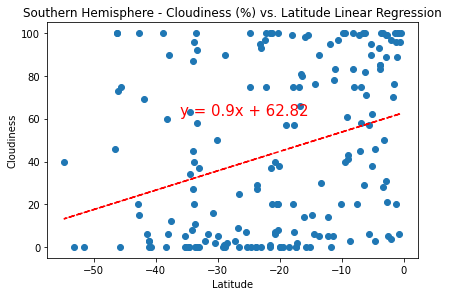

In [51]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.4, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005392923634444908


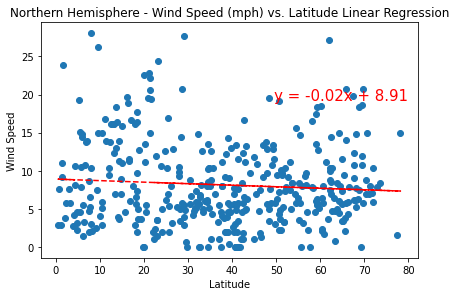

In [20]:
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0016587618631842052


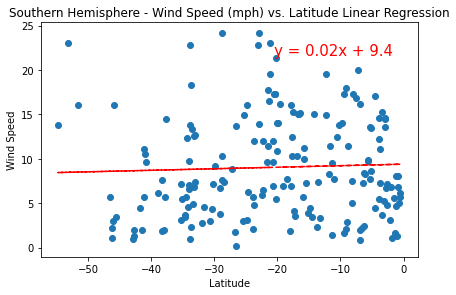

In [52]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .85), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()